In [99]:
#libraries installation
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

In [105]:
#sincronizing with Google Drive
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
# root_folder0="/content/drive/My Drive/Trading"
root_folder0="/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers.csv"
DB_path_1_years="Db/DataSet_all_tickers_1_years.csv"
DB_path_3_years="Db/DataSet_all_tickers_3_years.csv"
DB_path_5_years="Db/DataSet_all_tickers_5_years.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
Data		     LSTM_FABIAN.ipynb		ProjectFinalPresentaion.pptx
Db		     mean_causation_matrix.csv	technical_indicators2.ipynb
loading_data_tes.py  MVAR_analysis.ipynb	technical_indicators.ipynb
LSTM_attamp_1.ipynb  Papers


In [101]:
#calling libraries
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
#importing the most important tickers over the world
top_tickers=pdr.get_tops_iex().head(10000)


In [97]:
top_tickers

,symbol,sector,securityType,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,marketPercent
0,ANDAR,n/a,right,0,0,0,0,1613509200000,0.000,0,0,0,0.00000
1,DFIN,diversifiedfinancials,commonstock,0,0,0,0,1613509202281,22.515,100,1613509178338,8000,0.03931
2,OCSL,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,6.210,100,1613509059984,16467,0.02738
3,THR,capitalgoods,commonstock,0,0,0,0,1613509317177,17.010,100,1613509171650,6950,0.05927
4,ECC,n/a,closedendfund,0,0,0,0,1613509200000,11.550,300,1613506038110,1740,0.00985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,IXC,n/a,etp,0,0,0,0,1613509200337,23.465,100,1613509186581,12080,0.01131
9850,GROW,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,7.165,200,1613509187909,8545,0.01618
9851,JMIA,retailing,adr,0,0,0,0,1613512735919,61.880,100,1613509194534,128528,0.02752
9852,APO,diversifiedfinancials,commonstock,0,0,0,0,1613509201982,51.530,50,1613509196571,21175,0.02205


In [53]:
# # !pip install iexfinance
# from iexfinance.refdata import get_iex_symbols

# # tickers=pdr.get_iex_symbols()
# tickers=pdr.get_nasdaq_symbols()
# len(tickers)


In [54]:
import numpy as np
#adding manually the first 100 most important tickers in the world
# tickers=["BTC-USD"]
# tickers=["TSLA"]
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [55]:
len(tickers)

102

In [103]:
#if we want to update the dataset
update_DB=True
#creating/verifying folders
!mkdir -p Db/

#
# import tickers stock prices
if update_DB:
  df0 = pdr.get_data_yahoo(tickers, start="2005-01-01", end="2021-12-31")
  df0.columns=df0.columns.swaplevel(0, 1)#interchanging the header, given by default
  df0.to_csv(DB_path_basic,sep='\t',index=True)



In [57]:
# df0.head()

In [104]:
#feature extraction
def Feature_Extraction(raw_df): 
    stock = StockDataFrame.retype(raw_df)
    #volume delta against previous day
    stock['volume_delta']

    # open delta against next 2 day
    # stock['open_2_d']

    # open price change (in percent) between today and the day before yesterday
    # 'r' stands for rate.
    stock['open_-2_r']

    # CR indicator, including 5, 10, 20 days moving average
    stock['cr']
    stock['cr-ma1']
    stock['cr-ma2']
    stock['cr-ma3']

    # # volume max of three days ago, yesterday and two days later
    # stock['volume_-3,2,-1_max']

    # # volume min between 3 days ago and tomorrow
    # stock['volume_-3~1_min']

    # KDJ, default to 9 days
    stock['kdjk']
    stock['kdjd']
    stock['kdjj']

    # # three days KDJK cross up 3 days KDJD
    # stock['kdj_3_xu_kdjd_3']

    # 2 days simple moving average on open price
    stock['open_2_sma']

    # MACD
    stock["macd"]
    # MACD signal line
    stock['macds']
    # MACD histogram
    stock['macdh']

    # bolling, including upper band and lower band
    stock['boll']
    stock['boll_ub']
    stock['boll_lb']

    # close price less than 10.0 in 5 days count
    stock['close_10.0_le_5_c']

    # CR MA2 cross up CR MA1 in 20 days count
    stock['cr-ma2_xu_cr-ma1_20_c']

    # count forward(future) where close price is larger than 10
    stock['close_10.0_ge_5_fc']

    # 6 days RSI
    stock['rsi_6']
    # 12 days RSI
    stock['rsi_12']

    # 10 days WR
    stock['wr_10']
    # 6 days WR
    stock['wr_6']

    # CCI, default to 14 days
    stock['cci']
    # 20 days CCI
    stock['cci_20']

    # TR (true range)
    stock['tr']
    # ATR (Average True Range)
    stock['atr']

    # DMA, difference of 10 and 50 moving average
    stock['dma']

    # DMI
    # +DI, default to 14 days
    stock['pdi']
    # -DI, default to 14 days
    stock['mdi']
    # DX, default to 14 days of +DI and -DI
    stock['dx']
    # ADX, 6 days SMA of DX, same as stock['dx_6_ema']
    stock['adx']
    # ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
    stock['adxr']

    # TRIX, default to 12 days
    stock['trix']
        # TRIX based on the close price for a window of 3
    stock['close_3_trix']
    # MATRIX is the simple moving average of TRIX
    stock['trix_9_sma']
    # TEMA, another implementation for triple ema
    stock['tema']
        # TEMA based on the close price for a window of 2
    stock['close_2_tema']

    # VR, default to 26 days
    stock['vr']
    # MAVR is the simple moving average of VR
    stock['vr_6_sma']

    stock["macd"] 
    stock["macds"]
    l_pd=pd.DataFrame(stock)
    
    l_pd.columns=l_pd.columns.set_names(['Atributes'])
    return l_pd

In [111]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=[1,3,5]
process_DS=False
if process_DS:
  for temp_year in num_years:
    DB_path_years="Db/DataSet_all_tickers_"+str(temp_year)+"_years.csv"
    # DB_path_basic
    df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
    df1.index = pd.to_datetime(df1.index)
    value_to_check = pd.Timestamp(date.today().year-temp_year-1,1,1)
    df1=df1[df1.index>= value_to_check]
    #deleting rows with null values
    # df1=df1.dropna()
    #buffer to store and process the tickers data
    # df1.index.name

    buff_Tickers=[]
    Tickers_DF=pd.DataFrame()
    tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
    new_tickers_name=[]
    # print(tickers_names)
    for ticker_name in tickers_names:
      # print(df1[ticker_name])
      # bn=df1[ticker_name].columns
      # print(bn)
      temp_df=df1[ticker_name].dropna()
      if len(temp_df)>=(temp_year*316*0.9):
        temp_pd=Feature_Extraction(df1[ticker_name])
        buff_Tickers.append(temp_pd)
        new_tickers_name.append(ticker_name)
    #concat all tickers dataframes already processed
    # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
    pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
    # pdtin=pdtin.set_names(['Symbols'])
    Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
    #pay attention to this because can delete important rows
    Tickers_DF=Tickers_DF.dropna()
    #saving into
    print("saving into: "+DB_path_years)
    Tickers_DF.to_csv(DB_path_years,sep='\t',index=True)
# else:
Tickers_DFs=[]
for temp_year in num_years:
    # Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
    Tickers_DFs.append( pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0))
print("DataSet Loaded")
# df1.columns

DataSet Loaded


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# len(new_tickers_name)

In [62]:
Tickers_DF.head(100)

Symbols          ATVI                        ...      XLNX                        
Atributes   adj close      close       high  ...    change          vr    vr_6_sma
Date                                         ...                                  
2015-01-20  19.347851  20.219999  20.340000  ... -0.388161   31.604860   32.207252
2015-01-21  19.233032  20.100000  20.180000  ...  1.095950   50.626788   32.464639
2015-01-22  19.701893  20.590000  20.600000  ... -6.143096   29.698681   31.890913
2015-01-23  19.759308  20.650000  20.830000  ...  0.821354   38.375717   34.377971
2015-01-26  19.941111  20.840000  20.870001  ... -0.738282   35.403690   37.017611
...               ...        ...        ...  ...       ...         ...         ...
2015-06-05  24.910866  25.770000  25.830000  ...  0.169460  182.155635  217.398967
2015-06-08  24.591869  25.440001  25.780001  ... -2.030026  157.486200  211.106770
2015-06-09  24.669199  25.520000  25.879999  ...  0.259009  157.235076  193.050233
2015-06-10  24.649868  25.500000  25.600000  ...  1.184067  156.974420  175.719738
2015-06-11  24.456533  25.299999  25.389999  ...  0.468088  172.769030  167.828453

[100 rows x 7371 columns]

In [63]:
#by company
# ticker_name="BTC-USD"
ticker_name="TSLA"
Tickers_DF[ticker_name].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.386002,38.386002,38.824001,37.408001,38.773998,22516000.0,4500000.0,-0.318784,38.206001,37.064820,36.645786,28.407671,7.978721,23.270673,23.448362,23.448362,24.178665,24.178665,21.987755,21.987755,38.456999,-0.477513,-0.298726,-0.178787,40.748833,1.874585,40.748833,44.498004,36.999663,False,0.0,11.0,False,True,5.0,38.613998,-0.227997,0.168119,14.392255,0.152916,...,76.729327,69.349806,40.723944,-102.386062,40.723944,-102.386062,1.416000,1.578836,40.3106,40.748833,-0.438233,-0.073997,0.000000,-0.521999,0.521999,0.000000,0.077007,0.077007,1.578836,4.877424,4.877424,0.521999,0.665471,0.665471,42.149439,42.149439,79.256860,79.256860,78.771807,78.771807,81.527816,81.527816,-0.460184,-1.132136,-0.348015,38.171331,38.407297,-0.590451,32.842985,34.069765
2015-01-21,39.313999,39.313999,39.736000,37.902000,37.910000,20765000.0,-1751000.0,-0.603040,38.984000,47.809157,34.251999,30.478685,19.354874,40.173609,29.023444,29.023444,25.793592,25.793592,35.483149,35.483149,38.341999,-0.450390,-0.330823,-0.119567,40.638461,1.838368,40.638461,44.315197,36.961726,False,0.0,12.0,False,True,5.0,38.386002,0.927998,0.590842,37.140194,0.403885,...,61.148444,48.827963,40.590103,-64.598218,40.590103,-64.598218,1.834000,1.609777,40.0164,40.638461,-0.622062,0.911999,0.911999,0.493999,0.000000,0.911999,0.208858,0.208858,1.609777,12.974349,12.974349,0.000000,0.560388,0.560388,34.811510,34.811510,45.697955,45.697955,69.152464,69.152464,77.928514,77.928514,-0.471132,-0.571544,-0.360434,38.856181,39.285086,2.417542,42.353033,36.469035
2015-01-22,40.324001,40.324001,40.647999,39.040001,39.400002,20584500.0,-180500.0,1.614492,40.004000,60.423490,34.485642,30.161694,26.504235,66.533274,41.526721,41.526721,31.037968,31.037968,62.504227,62.504227,38.655001,-0.365702,-0.338120,-0.027582,40.616000,1.768245,40.616000,44.152490,37.079510,False,0.0,13.0,False,True,5.0,39.313999,1.010002,1.142935,53.335033,0.701864,...,42.291627,8.881513,40.548238,-22.949097,40.548238,-22.949097,1.607998,1.609572,39.8298,40.616000,-0.786200,0.911999,0.911999,1.138000,0.000000,0.911999,0.317226,0.317226,1.609572,19.708739,19.708739,0.000000,0.474021,0.474021,29.450114,29.450114,19.816116,19.816116,54.876502,54.876502,71.258186,71.258186,-0.456396,0.147215,-0.378369,39.906256,40.326377,2.569065,51.780415,37.107915
2015-01-23,40.257999,40.257999,40.700001,39.666000,40.057999,17193000.0,-3391500.0,5.666048,40.208000,64.058325,36.283938,30.808548,28.474537,72.047764,51.700402,51.700402,37.925446,37.925446,79.250314,79.250314,39.729000,-0.301086,-0.330443,0.029357,40.592133,1.706429,40.592133,44.004991,37.179276,False,0.0,14.0,False,True,5.0,40.324001,-0.066002,1.095506,52.278836,0.687264,...,34.787821,13.426530,40.297286,-4.387034,40.525556,-14.144029,1.034000,1.545898,39.6432,40.592133,-0.948933,0.052002,0.052002,0.625999,0.000000,0.052002,0.277182,0.277182,1.545898,17.930184,17.930184,0.000000,0.402452,0.402452,26.033566,26.033566,18.431963,18.431963,44.369219,44.369219,63.505858,63.505858,-0.428261,0.486147,-0.395260,40.310628,40.313691,-0.163679,48.000773,39.835961
2015-01-26,41.310001,41.310001,41.723999,40.209999,40.366001,16172500.0,-1020500.0,2.451776,41.081333,75.263597,37.264815,31.480090,28.407671,91.236288,64.879031,64.879031,46.909974,46.909974

In [64]:
# Tickers_DF["TSLA"].head()

In [65]:
#each attribute $in lower case, sorry xD
Tickers_DF[ticker_name,"close"]

Date
2015-01-20     38.386002
2015-01-21     39.313999
2015-01-22     40.324001
2015-01-23     40.257999
2015-01-26     41.310001
                 ...    
2021-01-11    811.190002
2021-01-12    849.440002
2021-01-13    854.409973
2021-01-14    845.000000
2021-01-15    826.159973
Name: (TSLA, close), Length: 1510, dtype: float64

In [66]:
# Tickers_DF.xs('TSLA',level='Atributes',axis=1)
# df.xs('Symbols',level='TSLA',axis=1)


In [67]:
# # df_spy.head()
# df=df_aapl.tail(20)
# df_size=df.size
# columns=df_aapl.head(1).columns
# for num,(val,ticker) in enumerate(columns):
#   print(val)
#   print(ticker)

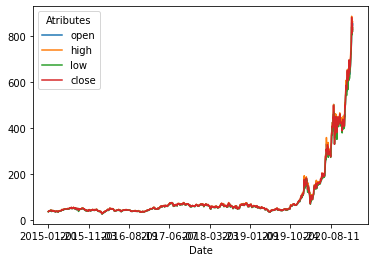

In [68]:
# df1.xs('TSLA',level='Symbols',axis=1)[["Open", "High", "Low", "Close"]].plot()

Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()

> # LSTM

In [69]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

In [70]:
df=Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])]
df.head()

Atributes,open,high,low,close
Date,,,,
2015-01-20,38.773998,38.824001,37.408001,38.386002
2015-01-21,37.910000,39.736000,37.902000,39.313999
2015-01-22,39.400002,40.647999,39.040001,40.324001
2015-01-23,40.057999,40.700001,39.666000,40.257999
2015-01-26,40.366001,41.723999,40.209999,41.310001


# Normalization

In [71]:
#creting object to scale the values
scaler = MinMaxScaler()
scaler_close = MinMaxScaler()
size_df=df.shape




In [72]:
#extracting the labels and features
close_price = df.close.values.reshape(-1, 1)
price = df.values.reshape(-1, size_df[1])
#escaling data
scaled = scaler.fit_transform(price)
scaled_close=scaler_close.fit_transform(close_price)

In [73]:
#checking stage
size_df=price.shape
# df.shape
size_df

(1510, 4)

In [74]:
#chcking if is there none values
np.isnan(scaled).any()

False

In [75]:
#removing none values
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled = scaled[~np.isnan(scaled)]

In [76]:
#reshaping
scaled_close = scaled_close.reshape(-1, 1)
scaled = scaled.reshape(-1, size_df[1])

In [77]:
print(scaled[0:10])

[[0.01245867 0.00917403 0.01134799 0.01133814]
 [0.01141461 0.01024258 0.01195746 0.01242826]
 [0.01321514 0.01131112 0.01336146 0.0136147 ]
 [0.01401026 0.01137205 0.01413379 0.01353717]
 [0.01438246 0.01257182 0.01480494 0.01477295]
 [0.01500841 0.01243357 0.01536013 0.01463903]
 [0.01541685 0.01204458 0.01415599 0.01308609]
 [0.01419878 0.01195319 0.01368224 0.01445578]
 [0.01489724 0.01230234 0.0152861  0.01407988]
 [0.01489965 0.01335214 0.01536013 0.01580432]]


In [78]:
np.isnan(scaled).any()

False

# Preprocessing

In [79]:
SEQ_LEN = 100
#function to build the windows to be send in the training and  calidation
def to_sequences(data, seq_len):
    d = []
    #extracting the windown depending on the 
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, -1]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, -1]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled, SEQ_LEN, train_split = 0.9)
# X_train_close, y_train_close, X_test_close, y_test_close = preprocess(scaled_close, SEQ_LEN, train_split = 0.9)#this is the worst way to do this but is only to check if it is working

In [80]:
X_train.shape

(1269, 99, 4)

In [81]:
y_train.shape

(1269,)

In [82]:
X_test.shape

(141, 99, 4)

In [83]:
X_test

array([[[0.17899885, 0.19074958, 0.17095517, 0.17465106],
        [0.16457047, 0.1619246 , 0.13893455, 0.1388558 ],
        [0.1347615 , 0.15017294, 0.13471265, 0.14220603],
        ...,
        [0.20727316, 0.20009702, 0.20948257, 0.19985057],
        [0.20701456, 0.20082812, 0.2104671 , 0.20160322],
        [0.20586175, 0.19822237, 0.20038247, 0.19198718]],

       [[0.16457047, 0.1619246 , 0.13893455, 0.1388558 ],
        [0.1347615 , 0.15017294, 0.13471265, 0.14220603],
        [0.14216421, 0.1440616 , 0.14532287, 0.14199693],
        ...,
        [0.20701456, 0.20082812, 0.2104671 , 0.20160322],
        [0.20586175, 0.19822237, 0.20038247, 0.19198718],
        [0.19623316, 0.19473085, 0.19643694, 0.19789119]],

       [[0.1347615 , 0.15017294, 0.13471265, 0.14220603],
        [0.14216421, 0.1440616 , 0.14532287, 0.14199693],
        [0.15894898, 0.15583436, 0.15085005, 0.14744985],
        ...,
        [0.20586175, 0.19822237, 0.20038247, 0.19198718],
        [0.19623316, 0.194730

In [84]:
X_test[:, :,[3]]#.reshape(-1,1,1)

array([[[0.17465106],
        [0.1388558 ],
        [0.14220603],
        ...,
        [0.19985057],
        [0.20160322],
        [0.19198718]],

       [[0.1388558 ],
        [0.14220603],
        [0.14199693],
        ...,
        [0.20160322],
        [0.19198718],
        [0.19789119]],

       [[0.14220603],
        [0.14199693],
        [0.14744985],
        ...,
        [0.19198718],
        [0.19789119],
        [0.19172639]],

       ...,

       [[0.43655362],
        [0.44786593],
        [0.43945982],
        ...,
        [0.92484307],
        [1.        ],
        [0.91914584]],

       [[0.44786593],
        [0.43945982],
        [0.44160716],
        ...,
        [1.        ],
        [0.91914584],
        [0.96407786]],

       [[0.43945982],
        [0.44160716],
        [0.47210925],
        ...,
        [0.91914584],
        [0.96407786],
        [0.96991605]]])

In [85]:
y_train.shape

(1269,)

# Model

In [86]:
#defining dropout to avoid overfitting
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
#Buidling the network model
model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

#defining a bidirectional LSTM in order to extract more information
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))
#definin the output 
model.add(Dense(units=1))

model.add(Activation('linear'))

# Training

In [87]:
model.compile(
    #ean squared error (commonly used in stockmarket predictions)
    loss='mean_squared_error', 
    #adam optimizer because is faster
    optimizer='adam'
)

In [88]:
#predicting in the test dataset
y_hat = model.predict(X_test)

In [89]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    #not random 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
18/18 [==============================] - 4s 96ms/step - loss: 0.0018 - val_loss: 0.0120
Epoch 2/50
18/18 [==============================] - 1s 45ms/step - loss: 1.0870e-04 - val_loss: 0.0135
Epoch 3/50
18/18 [==============================] - 1s 45ms/step - loss: 1.4208e-04 - val_loss: 0.0071
Epoch 4/50
18/18 [==============================] - 1s 46ms/step - loss: 8.7690e-05 - val_loss: 0.0090
Epoch 5/50
18/18 [==============================] - 1s 46ms/step - loss: 1.1019e-04 - val_loss: 0.0035
Epoch 6/50
18/18 [==============================] - 1s 45ms/step - loss: 9.1195e-05 - val_loss: 0.0062
Epoch 7/50
18/18 [==============================] - 1s 45ms/step - loss: 1.3690e-04 - val_loss: 0.0058
Epoch 8/50
18/18 [==============================] - 1s 46ms/step - loss: 9.7599e-05 - val_loss: 0.0065
Epoch 9/50
18/18 [==============================] - 1s 46ms/step - loss: 1.2441e-04 - val_loss: 0.0038
Epoch 10/50
18/18 [==============================] - 1s 45ms/step - loss: 9.9

In [90]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 2s 397ms/step - loss: 0.0164


0.016382088884711266

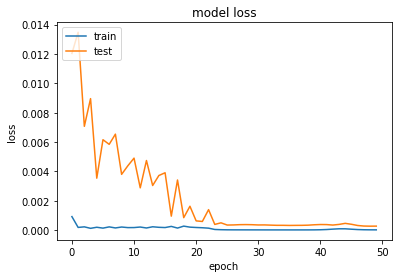

In [91]:
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

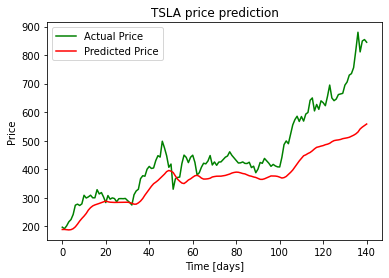

In [92]:

#predicting model
y_hat = model.predict(X_test)
#coming back to the non scaled values
y_test_inverse = scaler_close.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = scaler_close.inverse_transform(y_hat)
 
#plotting
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title(ticker_name+' price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();